<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/fuzzy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy matplotlib scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

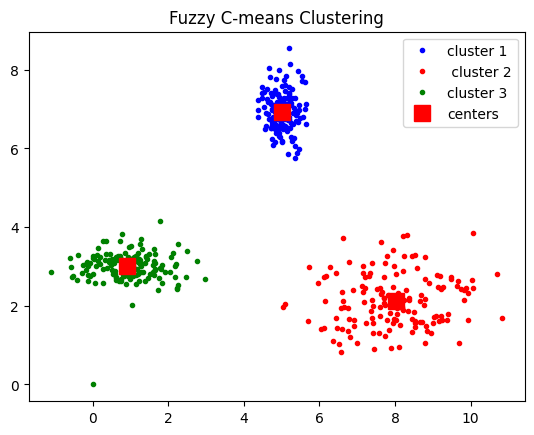

Data point #50 is located at (-0.41,2.66)

Membership value for each cluster:
Cluster1: 0.04
Cluster2: 0.02
Cluster3: 0.94

Sum of memberships: 1.00


In [13]:
#Create  the sample data
colors = ['b', 'r' , 'g']
fig, ax = plt.subplots()

#Define the center of our cluster
centers = [[1,3],[5,7],[8,2]]

#Define standard deviation of each cluster
sigmas = [[0.8,0.3],[0.3,0.5],[1.1,0.7]]

#Generate 150 data point for each cluster
np.random.seed(42)
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i,((xmu,ymu),(xsigma,ysigma)) in enumerate(zip(centers,sigmas)):
  xpts = np.hstack((xpts,np.random.standard_normal(150) * xsigma + xmu))
  ypts = np.hstack((ypts,np.random.standard_normal(150) * ysigma + ymu))
  labels = np.hstack((labels,np.ones(150) * i))

#Run the fuzzy C-means Algorithm
#Combine the x and y coordinates into single dataset
alldata = np.vstack((xpts,ypts))

#Set the fuzzy C model
n_clusters = 3
fuzziness_param = 2
cntr,u,u0,d,jm,p,fpc = fuzz.cluster.cmeans(
    alldata,c=n_clusters,m=fuzziness_param,error= 0.005,maxiter = 1000,init = None
)

#Visualize the result
cluster_membership = np.argmax(u,axis = 0)

#plot the original data,colored by its most likely cluster
for j in range(n_clusters):
  ax.plot(xpts[cluster_membership == j],
          ypts[cluster_membership == j], '.', color = colors[j])

#Mark the final cluster center
for pt in cntr:
  ax.plot(pt[0],pt[1],'rs', markersize = 12, label ='Cluster center')


ax.set_title('Fuzzy C-means Clustering')
ax.legend(['cluster 1', ' cluster 2', 'cluster 3', 'centers'])
plt.show()

#Inspect the Single Points Membership
#Lets check teh fuzzr membership
point_index = 50
print(f"Data point #{point_index} is located at ({alldata[0,point_index]:.2f},{alldata[1,point_index]:.2f})")
print("\nMembership value for each cluster:")
for i in range(n_clusters):
  print(f"Cluster{i+1}: {u[i,point_index]:.2f}")

#The sum of the value for the single point number is 0.1
print(f"\nSum of memberships: {u[:,point_index].sum():.2f}")
